In [1]:
# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output

# script specific imports
import os
import scipy as sp

In [7]:
home = '/nemo/lab/briscoej/home/users/maizelr/transcriptomics/sciFATE_data/pilots/SCI_PILOT2/data/'

In [93]:
files = [home+o+'/data/data.loom' for o in ['new_protocol','old_protocol']]
datas = [sc.read_loom(file) for file in files]

In [94]:
adata = datas[1].copy()
adata.var=adata.var.set_index('var_names')
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var_names_make_unique()
adata = adata[adata.obs.n_genes_by_counts>=1000]

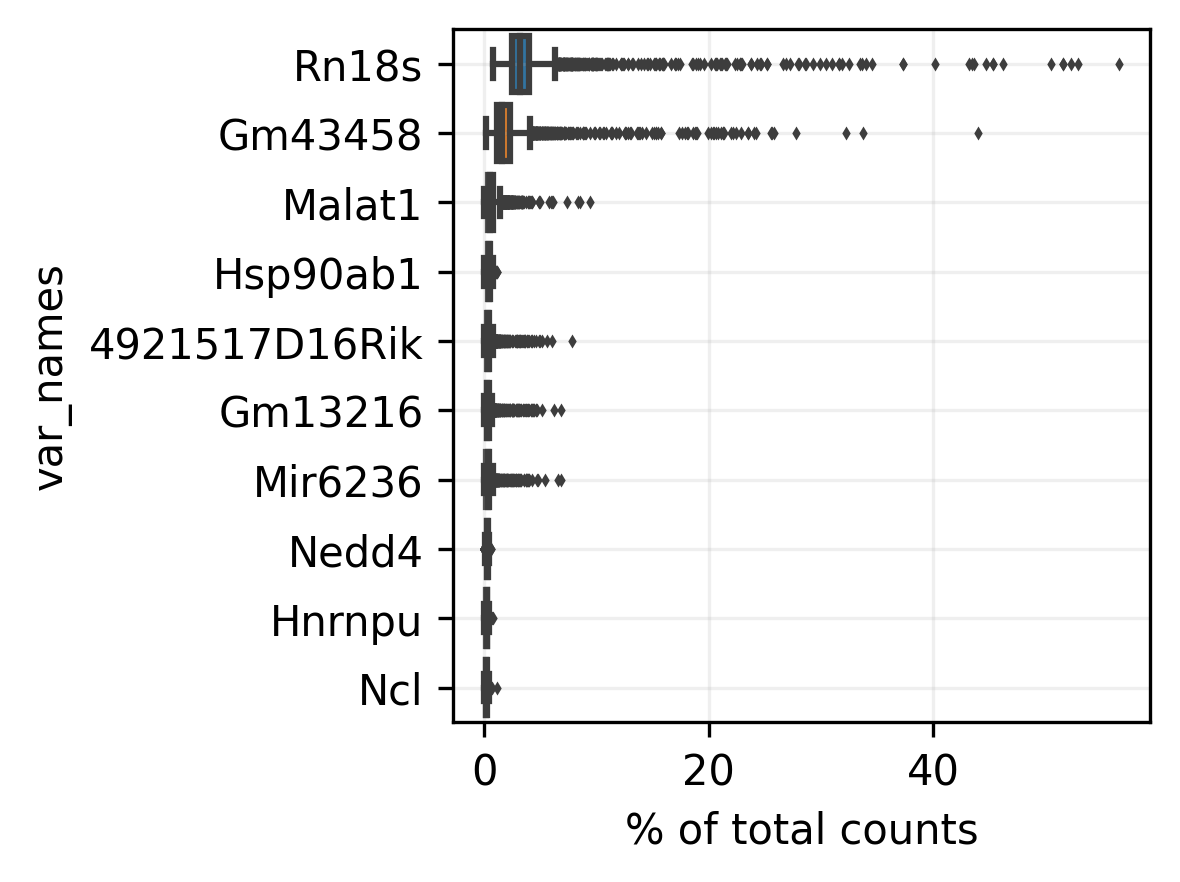

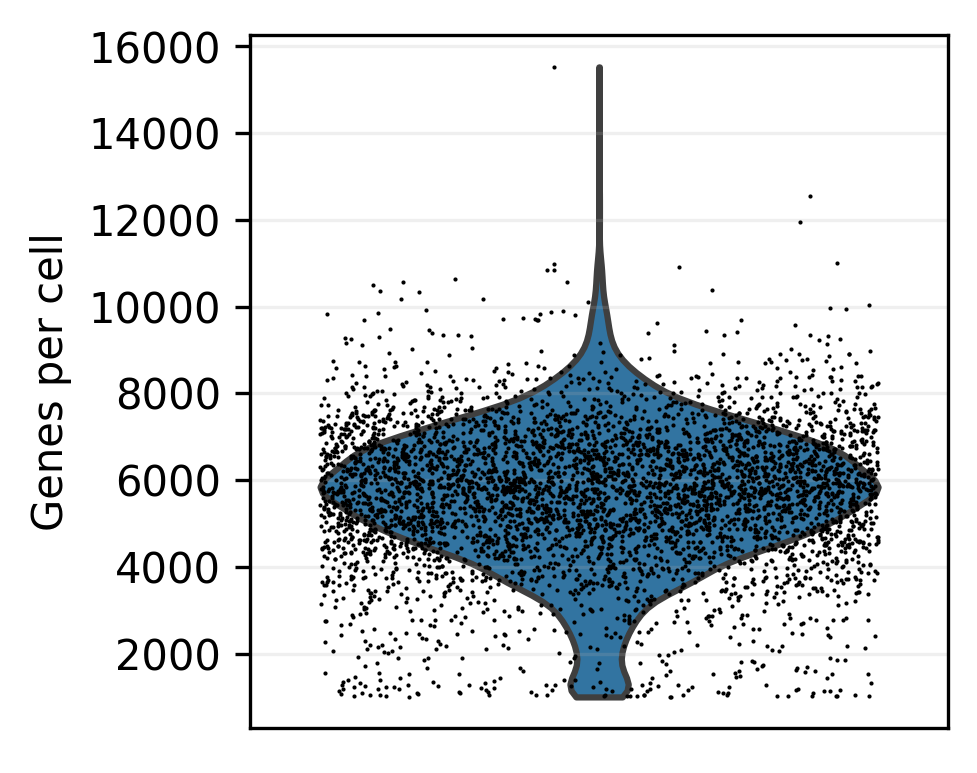

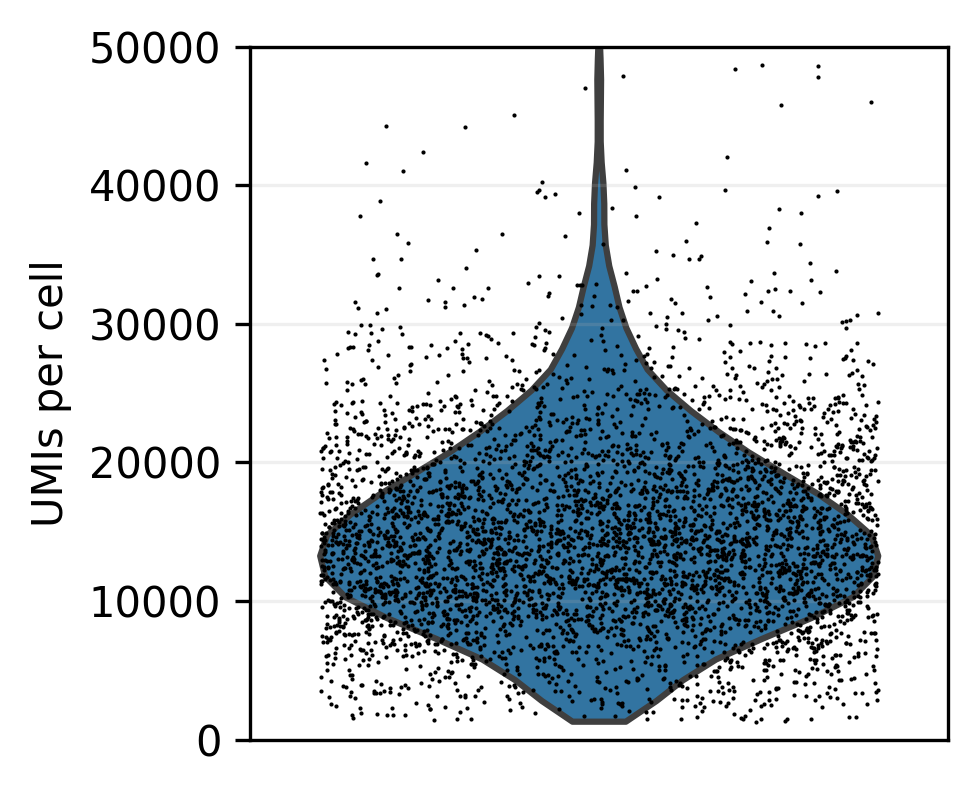

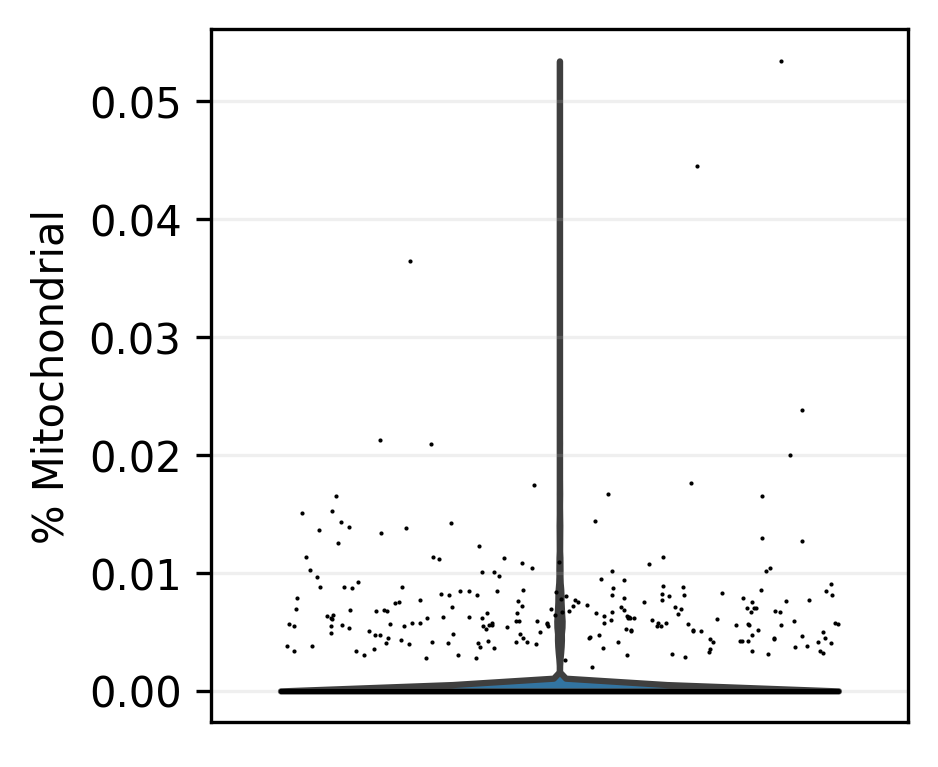

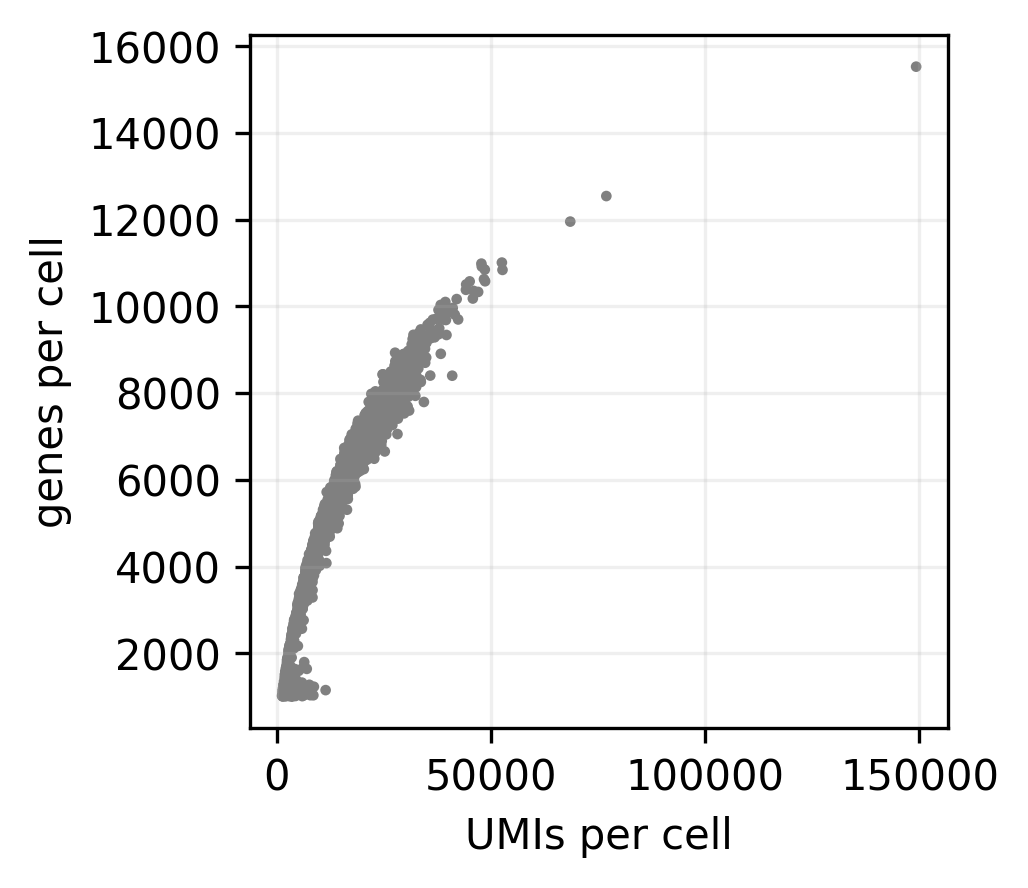

In [96]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.highest_expr_genes(adata, n_top=10, ax=ax, show=False)
plt.grid(alpha=0.2)
plt.savefig("scif_fixed1.png", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.violin(adata, ['n_genes_by_counts'],dpi=300,
             jitter=0.4, ax=ax, show=False) 
plt.grid(alpha=0.2)
plt.ylabel("Genes per cell")
plt.xticks([])
plt.savefig("scif_fixed2.png", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.violin(adata, ['total_counts'],dpi=300,
             jitter=0.4, ax=ax, show=False)
plt.grid(alpha=0.2)
plt.ylabel("UMIs per cell")
plt.ylim((0,50000))
plt.xticks([])
plt.savefig("scif_fixed3.png", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.violin(adata, ['pct_counts_mt'],dpi=300,
             jitter=0.4, ax=ax, show=False)
plt.grid(alpha=0.2)
plt.ylabel("% Mitochondrial")
plt.xticks([])
plt.savefig("scif_fixed4.png", bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.subplots()
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', show=False, ax=ax)
plt.grid(alpha=0.2)
plt.ylabel("genes per cell")
plt.xlabel("UMIs per cell")
plt.savefig("scif_fixed5.png", bbox_inches='tight')
plt.show()

In [66]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')


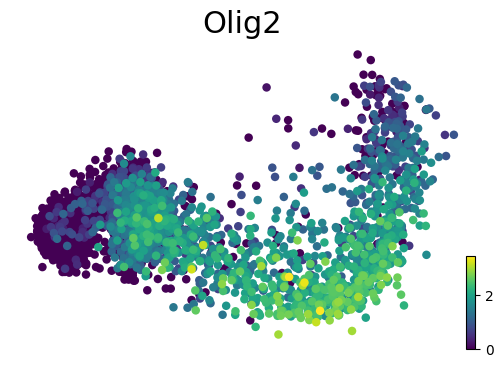

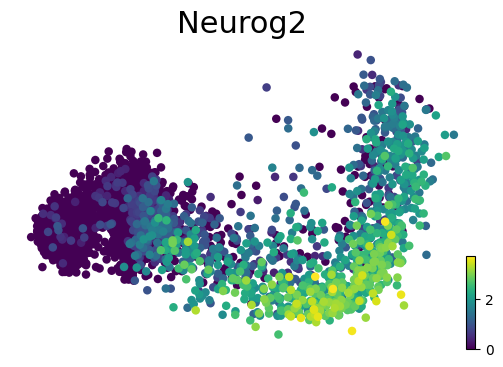

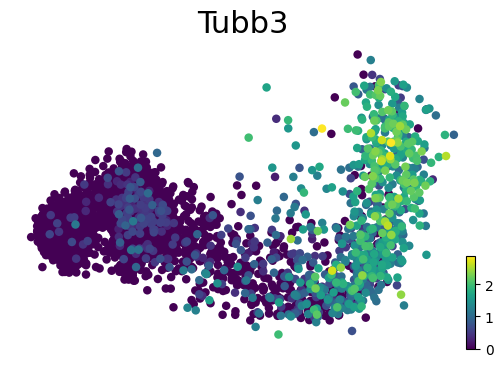

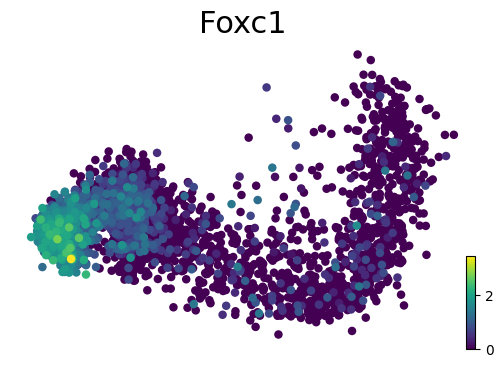

In [88]:
gene='Olig2'
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.subplots()
scv.pl.pca(adata, color=gene, components='1,3', size=150, ax=ax, show=False)
ax.set_title(gene, fontsize=22)
plt.savefig("scif_olig2.png", bbox_inches='tight')
plt.show()

gene='Neurog2'
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.subplots()
scv.pl.pca(adata, color=gene, components='1,3', size=150, ax=ax, show=False)
ax.set_title(gene, fontsize=22)
plt.savefig("scif_neurog2.png", bbox_inches='tight')
plt.show()

gene='Tubb3'
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.subplots()
scv.pl.pca(adata, color=gene, components='1,3', size=150, ax=ax, show=False)
ax.set_title(gene, fontsize=22)
plt.savefig("scif_tubb3.png", bbox_inches='tight')
plt.show()

gene='Foxc1'
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.subplots()
scv.pl.pca(adata, color=gene, components='1,3', size=150, ax=ax, show=False)
ax.set_title(gene, fontsize=22)
plt.savefig("scif_foxc1.png", bbox_inches='tight')
plt.show()

In [ ]:
home = '/nemo/lab/briscoej/home/users/maizelr/transcriptomics/sciFATE_data/pilots/'
